<a href="https://colab.research.google.com/github/MuratAitov/HSE/blob/main/HW_titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analysis and Forecasting of Heterogeneous Time Series, National Research University Higher School of Economics (HSE), Academic Year 2022-23
## Homework Assignment #3. Pandas and Matplotlib Libraries

# Murat Aitov

### Общая информация

Each task is worth 3 points.

The homework grade is calculated using the following formula:

s
pandas
×
10
/
48
,
s
pandas
​
 ×10/48,
where $s_{\text{pandas}}$ is the total number of points you earned for the tasks.

For submitting the assignment later than the deadline, a penalty of 1 secondary point per day is applied to the final grade for the assignment, but the delay cannot exceed one week.

Important: This homework assignment includes several tasks for which you can earn bonus points. Bonus points are added to the regular points, and it is possible that your final grade will exceed 10. In this case, that will be your grade. In other words, for this assignment, it is possible to receive more than 10 points.

### About


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import copy
%matplotlib inline

### 1

In this homework assignment, you will work with data about passengers from the sunken "Titanic," which we briefly discussed in the lecture earlier. The data description, as well as the data itself (from where they should be downloaded), can be found at the following link: https://www.kaggle.com/c/titanic/data

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [ ]:
titanic= pd.read_csv('train.csv', delimiter=',')
print(titanic.shape)
pd.concat([titanic.head(), titanic.tail()])

(891, 11)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
def capitalize_column_name(column_name):
    words = column_name.split('_')
    capitalized_words = [word.capitalize() for word in words]
    return ' '.join(capitalized_words)
titanic.columns = [capitalize_column_name(col) for col in titanic.columns]

In [ ]:
titanic.insert(0, 'PassengerId', range(1, len(titanic) + 1))
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Таблица имеет размер: 891 строка, 12 столбов.

### 2

### 3

Come up with three data analysis tasks that could be solved for this dataset:

1. Regression task - in other words, predicting a certain numerical outcome for each object.
2. Classification task - in other words, assigning each object to one of two or more predefined classes (groups).
3. Clustering task - in other words, grouping all objects into an unknown number of clusters based on their similarity to each other.

*You can learn more about what regression, classification, and clustering tasks represent, for example, on Wikipedia. There's also an explanation in simple language with a specific example in this [article](https://habr.com/en/company/simbirsoft/blog/565396/) (at the beginning).*

1) Does a person's chance of survival increase if they were not alone on board?
2) Whose survival rate is better, women's or men's?
3) Group passengers by cabin class, based on whether they survived or not.

### 4

What is the proportion of survivors among the crashed passengers? What is the proportion of men and women among the survivors?

In [ ]:
#data_by_survive = titanic.groupby('Survived')
#data_by_survive.describe()
surv=titanic[titanic["Survived"] == 1]
print(surv.shape[0]/titanic.shape[0])#The proportion of survivors.
male=titanic[(titanic["Sex"] == "male") & (titanic["Survived"] == 1)]
female=titanic[(titanic["Sex"] == "female") & (titanic["Survived"] == 1)]
#print(male.shape, female.shape, titanic.shape, surv.shape) #The number of men, women, and passengers.
print(male.shape[0]/surv.shape[0], female.shape[0]/surv.shape[0])

0.3838383838383838
0.31871345029239767 0.6812865497076024


Conclusions: Proportion of surviving passengers: 0.38; When looking at the survivors by gender, there were more female survivors, accounting for 0.68 of the total, which is logical since women and children are usually prioritized for rescue. The proportion of male survivors among the total is 0.32.

### 5

How many passengers were traveling in each class? In the most populous class, were there more men or women?

In [ ]:
first=titanic[titanic["Pclass"]==1]
second=titanic[titanic["Pclass"]==2]
third=titanic[titanic["Pclass"]==3]
print(first.shape[0], second.shape[0], third.shape[0])
male=third[third["Sex"] == "male"]
female=third[third["Sex"] == "female"]
print(male.shape[0], female.shape[0])

216 184 491
347 144


Conclusions: There were 216 passengers in the first class, 184 in the second class, and 491 in the most populous third class. In the third class, there were more men than women, with 347 men compared to 144 women.

### 6

Display the minimum, average, and maximum fare amounts paid by passengers. Perform the same analysis for passengers who boarded the ship in Southampton. Display histograms depicting the distribution of ticket fares based on the embarkation point. What can be concluded from the results you obtain?

0.0 32.204207968574636 512.3292
0.0 27.079811801242233 263.0


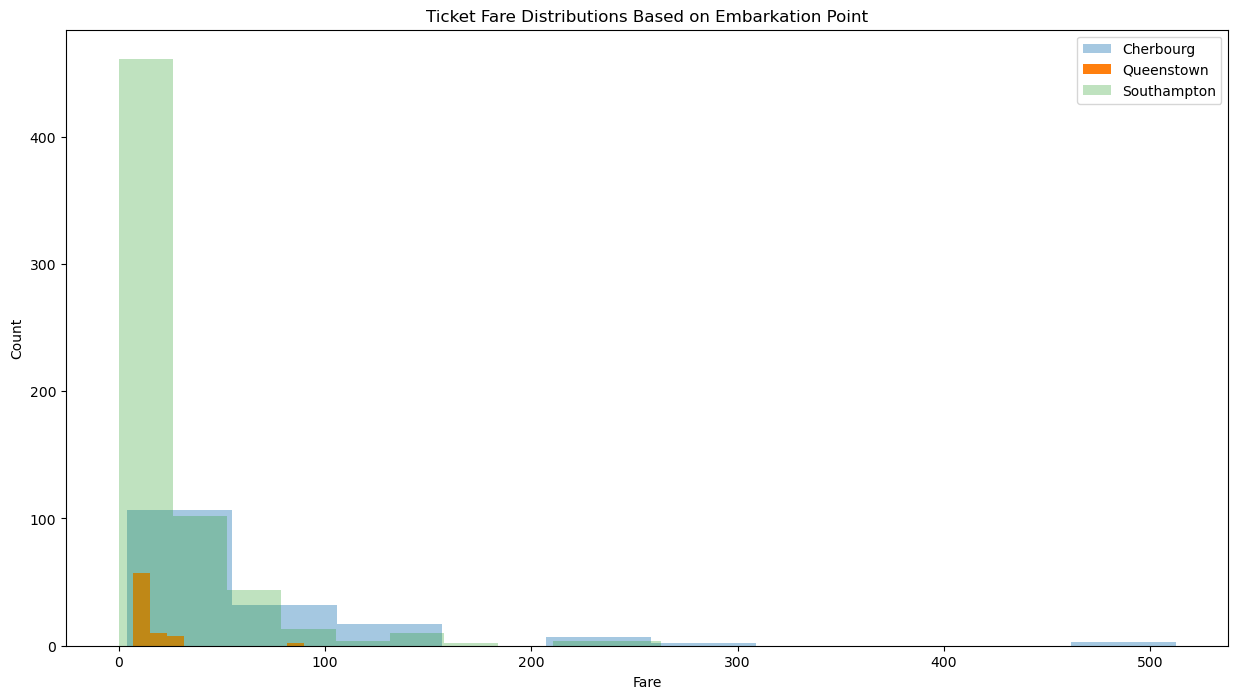

In [ ]:
print(titanic["Fare"].min(), titanic["Fare"].mean(), titanic["Fare"].max())
titanic1 = titanic[titanic["Embarked"] == "S"]
print(titanic1["Fare"].min(), titanic1["Fare"].mean(), titanic1["Fare"].max())

plt.figure(figsize=(15, 8))
plt.title('Ticket Fare Distributions Based on Embarkation Point')
plt.hist(titanic[titanic["Embarked"] == "C"]["Fare"], alpha=0.4)
plt.hist(titanic[titanic["Embarked"] == "Q"]["Fare"], alpha=1)
plt.hist(titanic[titanic["Embarked"] == "S"]["Fare"], alpha=0.3)
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


Conclusions:
1) For the first task, it's a straightforward calculation. The minimum fare paid by a passenger was 0 (since some tickets were given away); the average fare was 32.2; and the maximum fare was 512.33. Regarding passengers who boarded the ship in Southampton, the minimum fare paid was 0; the average fare was 27.1; and the maximum fare was 263.
2) For the second task, as evident from the graph, the passenger who paid the maximum fare, and in general, passengers who bought the most expensive tickets, boarded in Cherbourg. The majority of passengers with the cheapest tickets boarded in Southampton. Interestingly, the fewest passengers (less than 100) boarded the ship in Queenstown.

### 7

Do all the features contain useful information? Why? Remove unnecessary columns. Justify your choice.

In [ ]:
titanic=titanic.drop(columns=['PassengerId'])
titanic=titanic.drop(columns=['Ticket'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Conclusions: Passenger IDs are unnecessary as pandas automatically assigns index to passengers. Ticket numbers are the most ambiguous variable in this dataset. I encountered difficulties in identifying this column even in the second task because it's impossible to treat it as a unified entity due to the varying ticket formats.

### 8

Are there any missing values in the data? If yes, in which columns? How many missing values are there in each of them?

In [ ]:
print(titanic.isnull().any().any())
titanic.isnull().sum()

True


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
Sibsp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Conclusions: Yes, as indicated by the first print statement, there are missing values in the dataframe. There are 177 missing values in the 'Age' column, 687 missing entries for passenger cabins, and 2 missing values regarding the embarkation port.

### 9


Think about how to fill in the missing values in each column and do so. Make sure that there are no missing values left anywhere.


In [ ]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].mean())
titanic["Embarked"]=titanic["Embarked"].fillna('S')
titanic["Cabin"]=titanic["Cabin"].fillna('N')
titanic.isnull().any().any()

False

Conclusion: For the 'Age' column, I will fill the missing values with the mean age. In the 'Embarked' column, there are two missing values. Since the majority of passengers boarded from port "S," I will assign these missing values to that port. Additionally, for passengers with unknown cabins, I've assigned "N."

### 10

Calculate the correlation between the ticket fare and the age of passengers. Also, visually check the presence of this relationship using a scatter plot. This scatter plot can assist you in visualization. What conclusions can be drawn?

0.09156609328505762


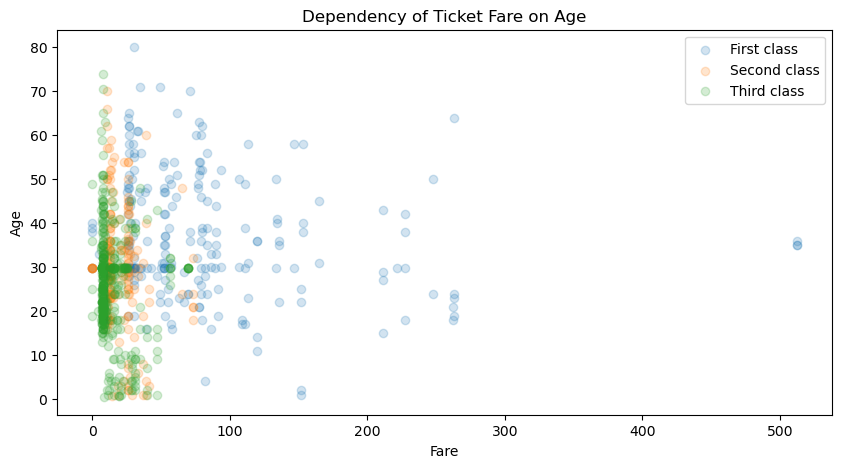

In [ ]:
print(titanic["Fare"].corr(titanic["Age"]))

plt.figure(figsize=(10, 5))
plt.title('Dependency of Ticket Fare on Age')

plt.scatter(titanic[titanic["Pclass"] == 1]['Fare'], titanic[titanic["Pclass"] == 1]['Age'], alpha=0.2)
plt.scatter(titanic[titanic["Pclass"] == 2]['Fare'], titanic[titanic["Pclass"] == 2]['Age'], alpha=0.2)
plt.scatter(titanic[titanic["Pclass"] == 3]['Fare'], titanic[titanic["Pclass"] == 3]['Age'], alpha=0.2)
plt.legend(['First class', 'Second class', 'Third class'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()


Conclusions: The correlation is 0.1, indicating a very weak correlation, which is further confirmed by the scatter plot. The plot illustrates that the relationship is primarily driven by passenger class. Fare is more dependent on the ticket class rather than age, as demonstrated in the graph.

### 11


Is it true that passengers with more expensive tickets were more likely to survive? Is there a correlation between survival rate and class? Justify your answer.

In [ ]:
print(titanic[titanic["Survived"]==1]["Fare"].mean(), titanic[titanic["Survived"]==0]["Fare"].mean())
t1=titanic[(titanic["Survived"]==1) & (titanic["Pclass"]==1)]
t11=titanic[titanic["Pclass"]==1]
t2=titanic[(titanic["Survived"]==1) & (titanic["Pclass"]==2)]
t22=titanic[titanic["Pclass"]==2]
t3=titanic[(titanic["Survived"]==1) & (titanic["Pclass"]==3)]
t33=titanic[titanic["Pclass"]==3]
print(t1.shape[0]/t11.shape[0], t2.shape[0]/t22.shape[0], t3.shape[0]/t33.shape[0])

48.39540760233918 22.117886885245902
0.6296296296296297 0.47282608695652173 0.24236252545824846


Conclusions:
1) The average ticket fare for survivors was 48.4, whereas for non-survivors it was 22.12. This suggests that the chance of survival was higher for passengers with more expensive tickets.
2) The correlation between survival rate and class is evident. Survival rates by class were as follows: 63% for first class, 47% for second class, and 24% for third class. This indicates, similar to the first point, that higher class correlated with higher survival rates.

### 12

Creating new features (feature engineering) is one of the key ways to improve the performance of machine learning algorithms during data preprocessing. It's also an excellent way to enhance the quality of your insights from the analysis as a whole! Add a column to the table that will indicate how many relatives were on the ship with the passenger, including the passenger themselves. How could such a feature be useful?

In [ ]:
titanic['Relatives']=1+titanic['Sibsp']+titanic['Parch']
titanic.head()

,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Fare,Cabin,Embarked,Relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S,1


Conclusions: This new feature allows you to assess the probability of survival if a passenger had relatives on board.

### 13

Now come up with your own feature that could be useful for analysis (carries some information) and add it to the table. Be sure to justify why your feature is useful.

In [ ]:
titanic['Paluba'] = titanic["Cabin"].str[0]
titanic.head()

,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Fare,Cabin,Embarked,Relatives,Paluba
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S,2,N
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S,1,N
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S,1,N


I added the deck name. On the Titanic, there were a total of 8 decks. One was the lifeboat deck, denoted as T, and the other 7 were labeled based on their level from A to G, with A being the highest. The absence of deck information is marked with the letter N. This feature seemed interesting to me because a person's location on the ship during its sinking affected their chances of survival. The closer the deck level to the lifeboats, the higher the chances of survival. There's even information that those closest to the captain's bridge, located on the lifeboat deck, were among the first to learn about the breach.

### 14

What percentage of children managed to survive? (Children up to 10 years old, inclusive)

In [ ]:
teenA=titanic[(titanic["Age"]<=10)&(titanic["Survived"]==1)]
teenN=titanic[(titanic["Age"]<=10)]
print(round((teenA.shape[0]/teenN.shape[0])*100))

59


Answer: 59%

### 15

Build histograms for the distribution of real-valued features. Is there a difference in them? What might be the issue with this from both a data analysis and a machine learning perspective? Normalize the real-valued features and see how the situation changes. What conclusions can be drawn from the work done?

In-depth answers to the theoretical questions in this task are welcomed and could earn you 1-2 bonus points!

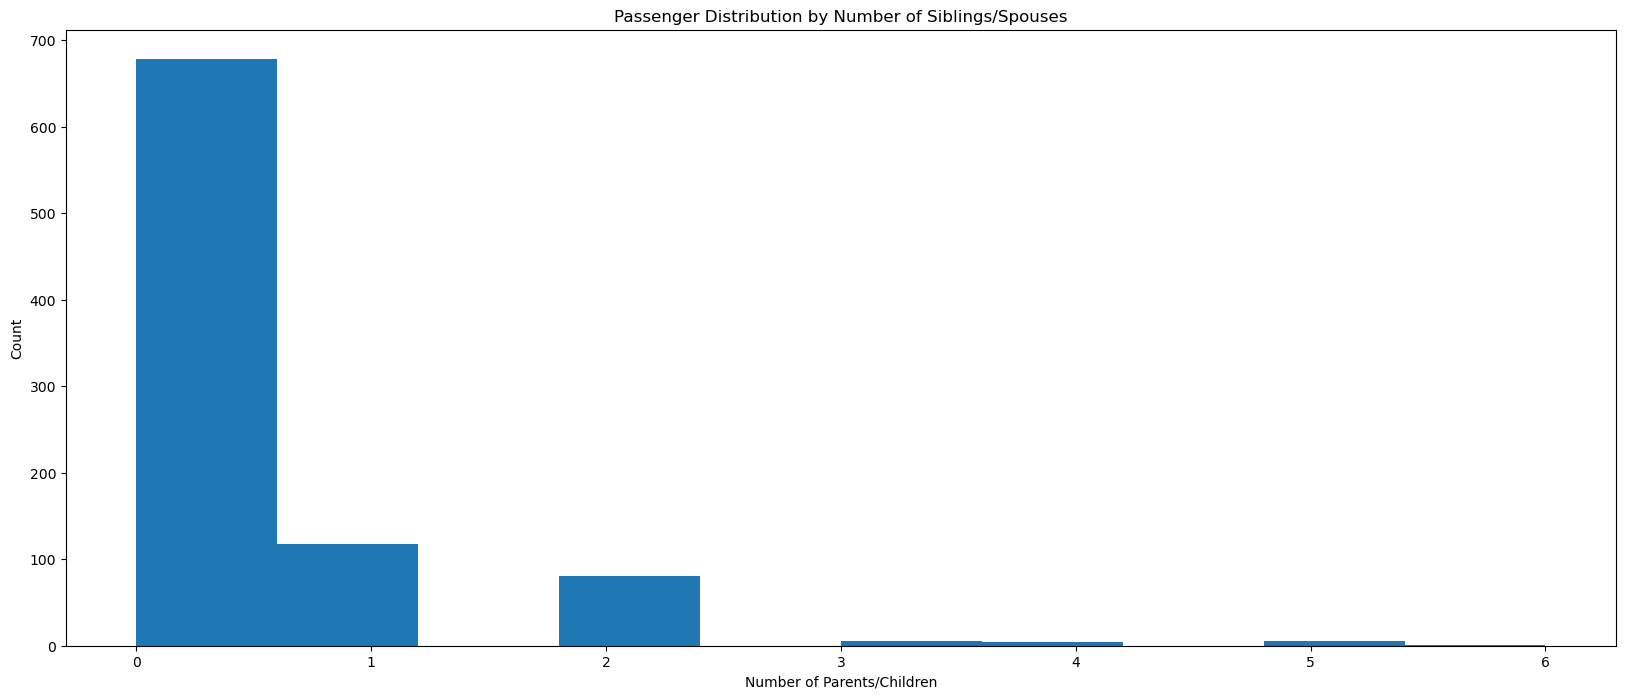

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Passenger Distribution by Number of Siblings/Spouses')
plt.hist(titanic["Parch"])
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()


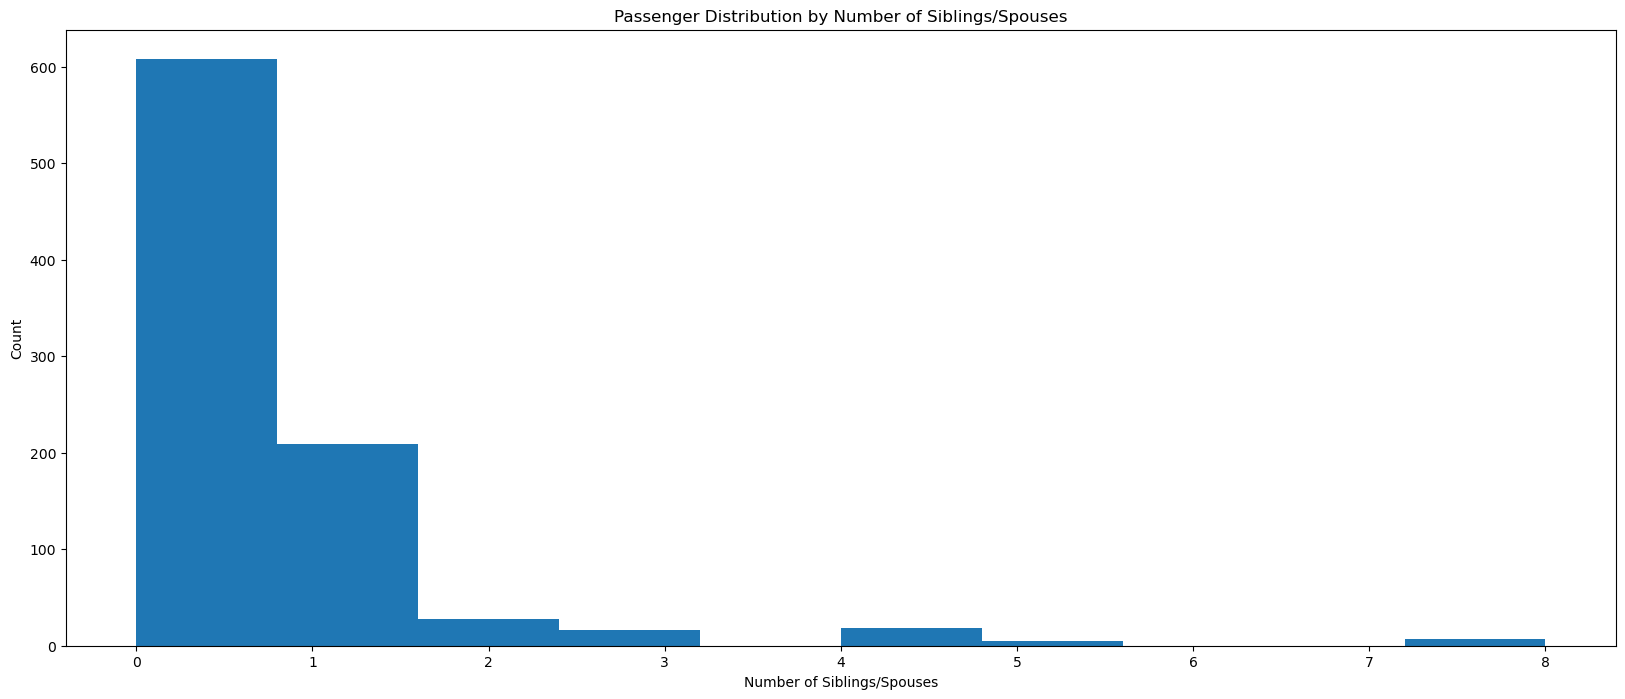

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Passenger Distribution by Number of Siblings/Spouses')
plt.hist(titanic["Sibsp"])
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()


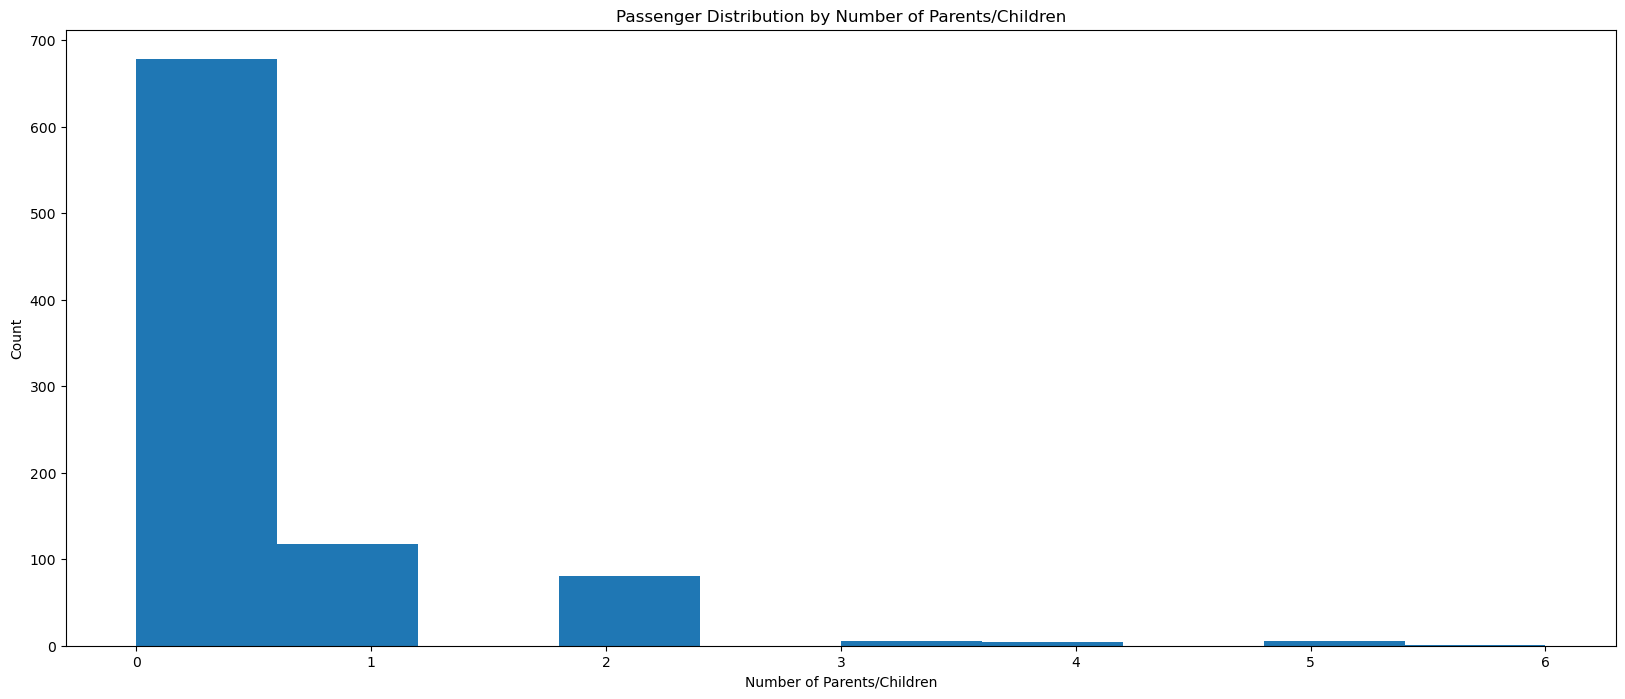

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Passenger Distribution by Number of Parents/Children')
plt.hist(titanic["Parch"])
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()


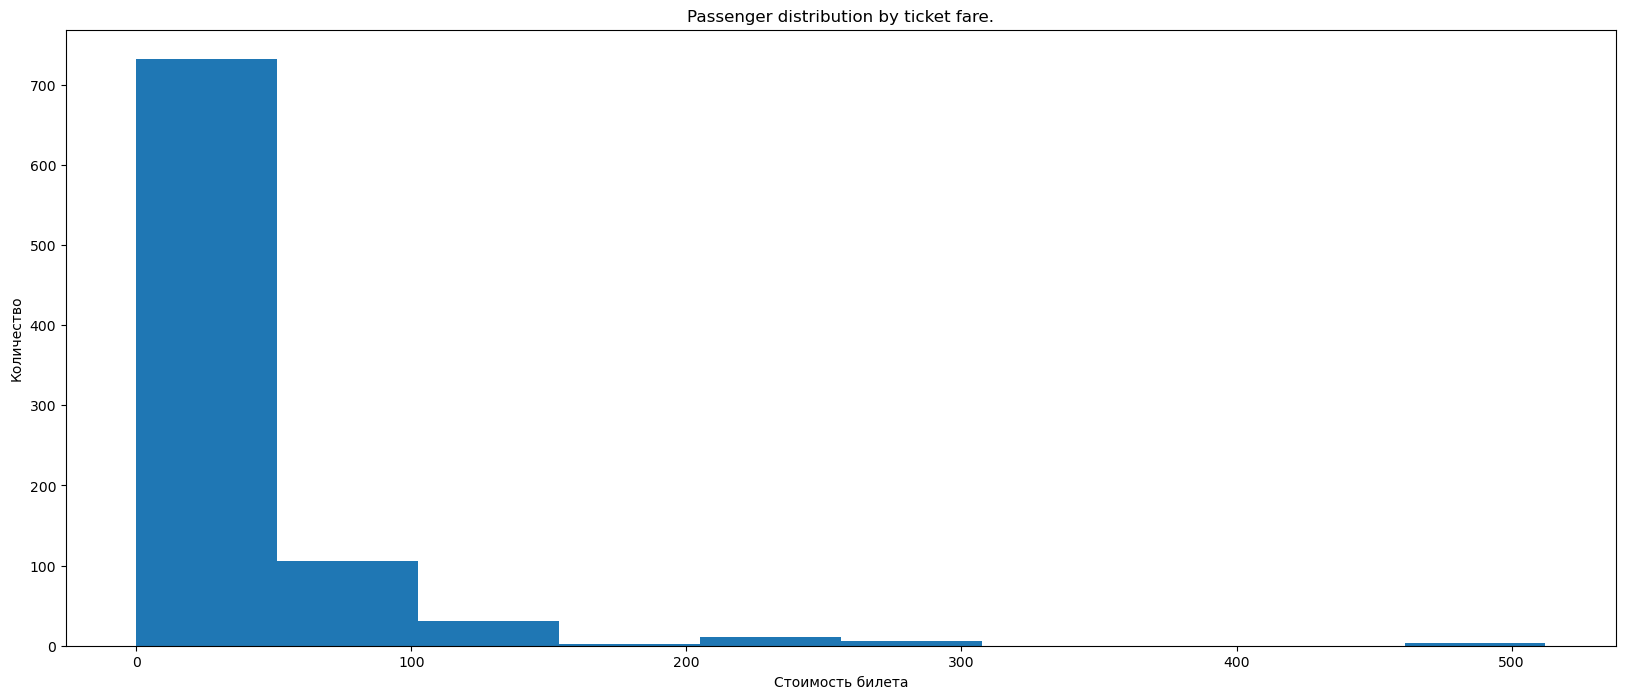

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Passenger distribution by ticket fare.')
plt.hist(titanic["Fare"])
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')
plt.show()

In [ ]:
titanic

,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Fare,Cabin,Embarked,Relatives,Paluba
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,N,S,2,N
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,2,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,N,S,1,N
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,2,C
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,N,S,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,N,S,1,N
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B42,S,1,B
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,N,S,4,N
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C148,C,1,C


Conclusion #1: Naturally, there is a difference in their distributions as all the data have different units of measurement, some in years, some in monetary currency, and some in quantities. In the case of machine learning, clustering elements of data without prior preparation, i.e., clustering, is not possible.

In [ ]:


titanic["Age1"]=(titanic["Age"]-titanic["Age"].mean())/titanic["Age"].std()
titanic=titanic.drop(columns=['Age'])

titanic["SibSp1"]=(titanic["Sibsp"]-titanic["Sibsp"].mean())/titanic["Sibsp"].std()
titanic=titanic.drop(columns=['Sibsp'])

titanic["Parch1"]=(titanic["Parch"]-titanic["Parch"].mean())/titanic["Parch"].std()
titanic=titanic.drop(columns=['Parch'])

titanic["Fare1"]=(titanic["Fare"]-titanic["Fare"].mean())/titanic["Fare"].std()
titanic=titanic.drop(columns=['Fare'])

titanic["Relatives1"]=(titanic["Relatives"]-titanic["Relatives"].mean())/titanic["Relatives"].std()
titanic=titanic.drop(columns=['Relatives'])

titanic.head()

,Survived,Pclass,Name,Sex,Cabin,Embarked,Paluba,Age1,SibSp1,Parch1,Fare1,Relatives1
0,0,3,"Braund, Mr. Owen Harris",male,N,S,N,-0.592148,0.432550,-0.473408,-0.502163,0.059127
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C,C,0.638430,0.432550,-0.473408,0.786404,0.059127
2,1,3,"Heikkinen, Miss. Laina",female,N,S,N,-0.284503,-0.474279,-0.473408,-0.488580,-0.560660
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S,C,0.407697,0.432550,-0.473408,0.420494,0.059127
4,0,3,"Allen, Mr. William Henry",male,N,S,N,0.407697,-0.474279,-0.473408,-0.486064,-0.560660


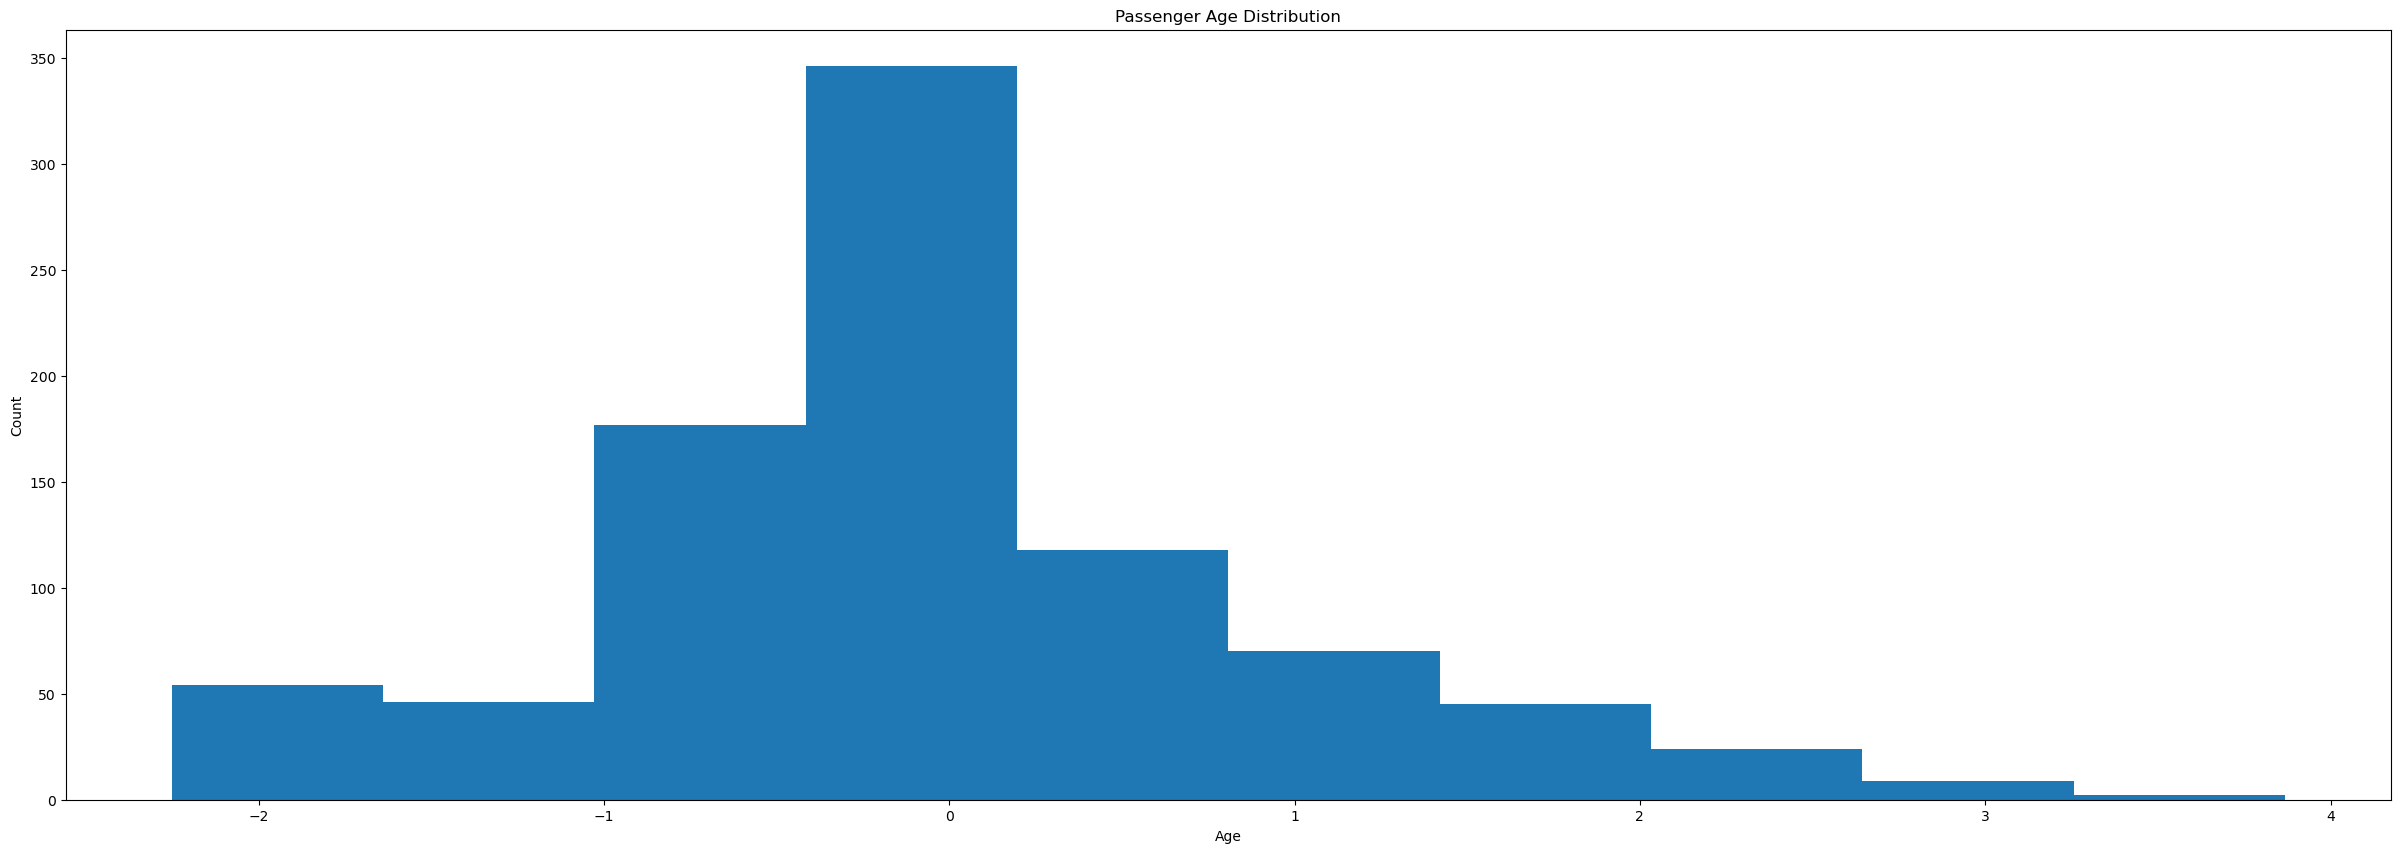

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Passenger Age Distribution')
plt.hist(titanic["Age1"])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


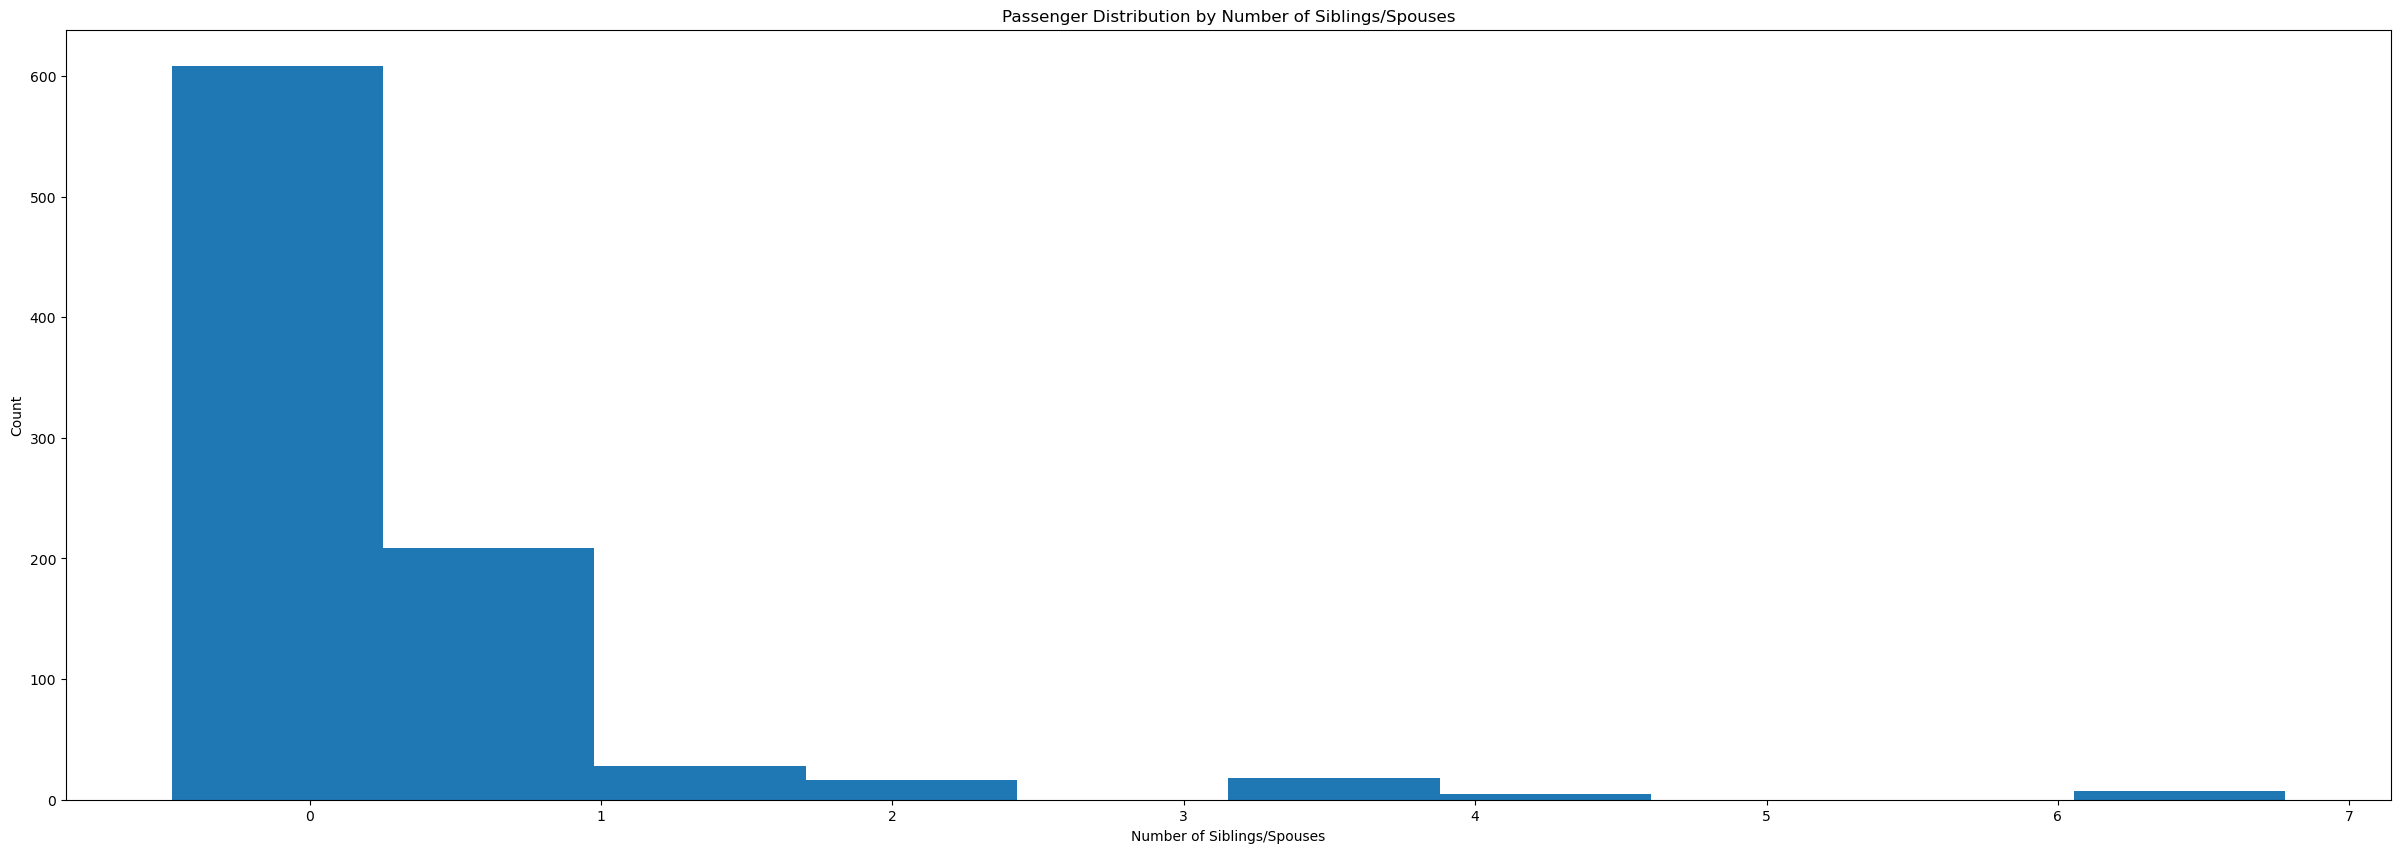

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Passenger Distribution by Number of Siblings/Spouses')
plt.hist(titanic["SibSp1"])
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()


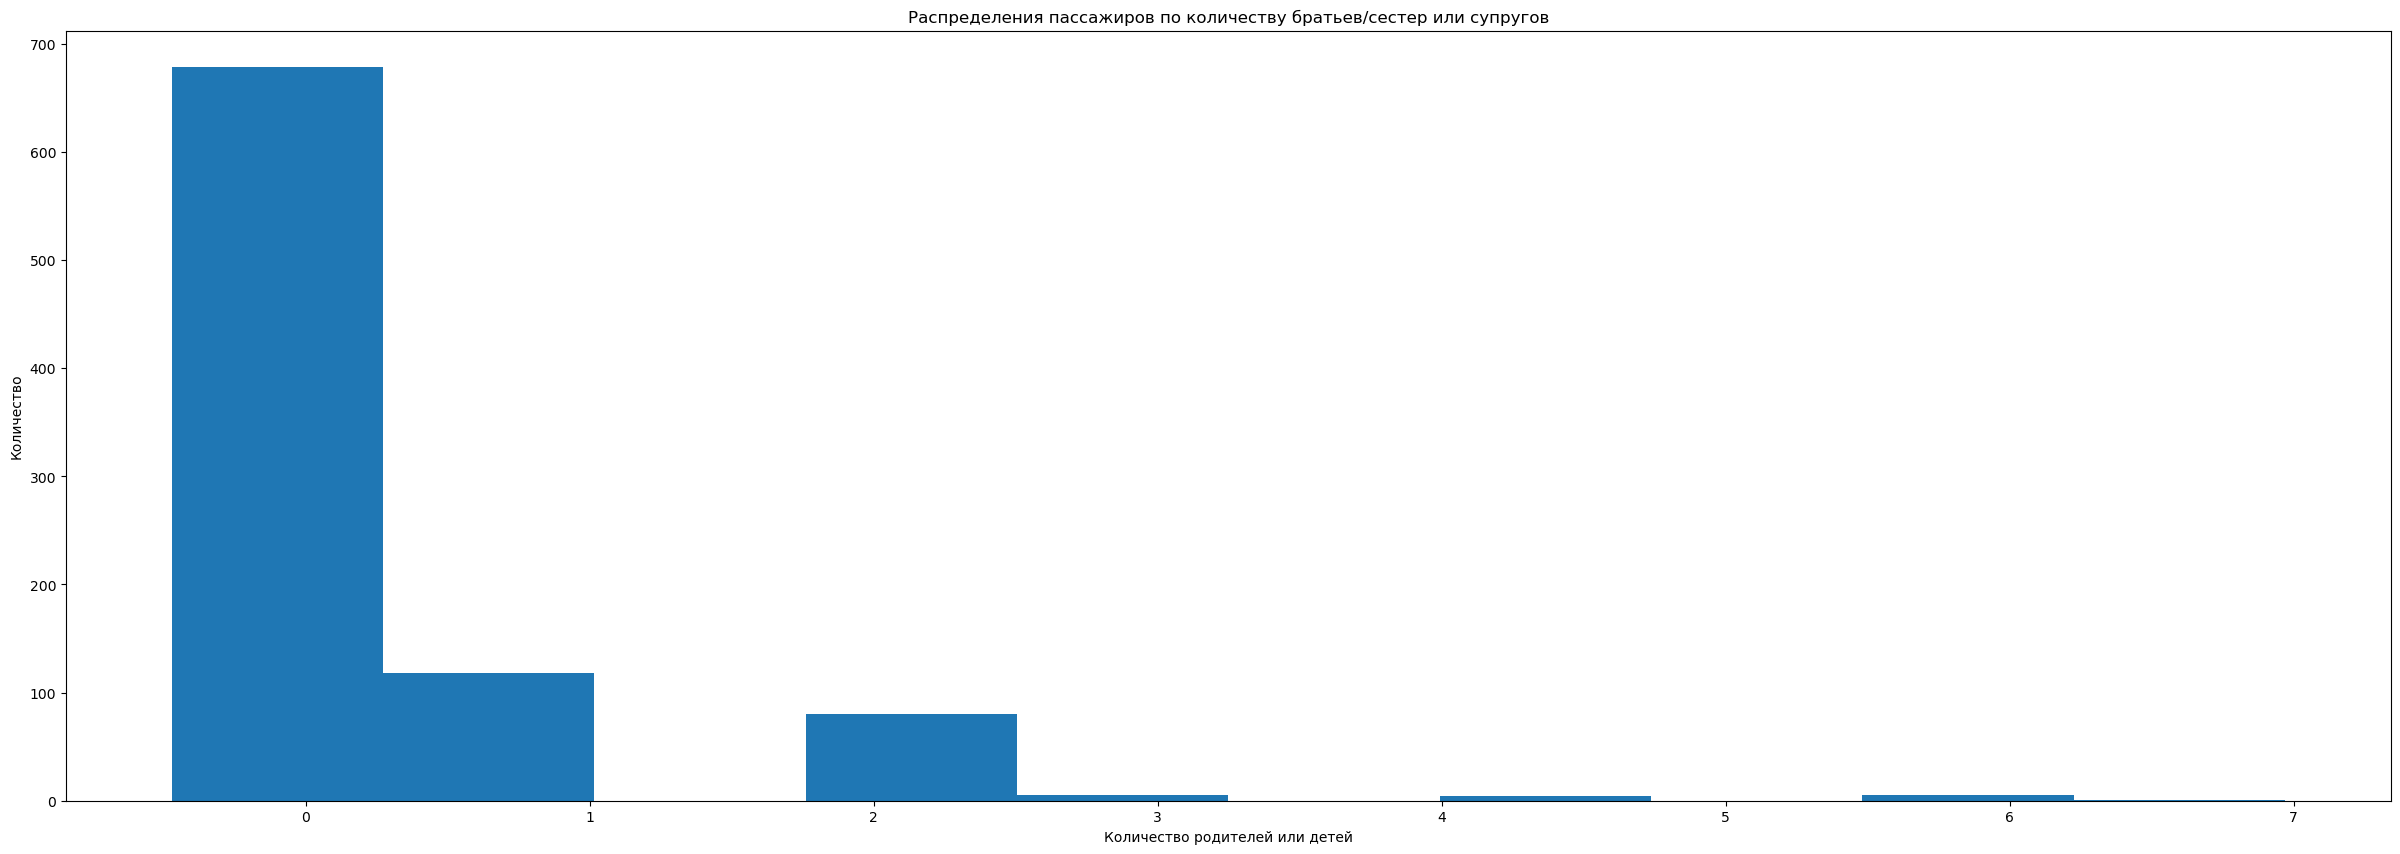

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Распределения пассажиров по количеству братьев/сестер или супругов')
plt.hist(titanic["Parch1"])
plt.xlabel('Количество родителей или детей')
plt.ylabel('Количество')
plt.show()

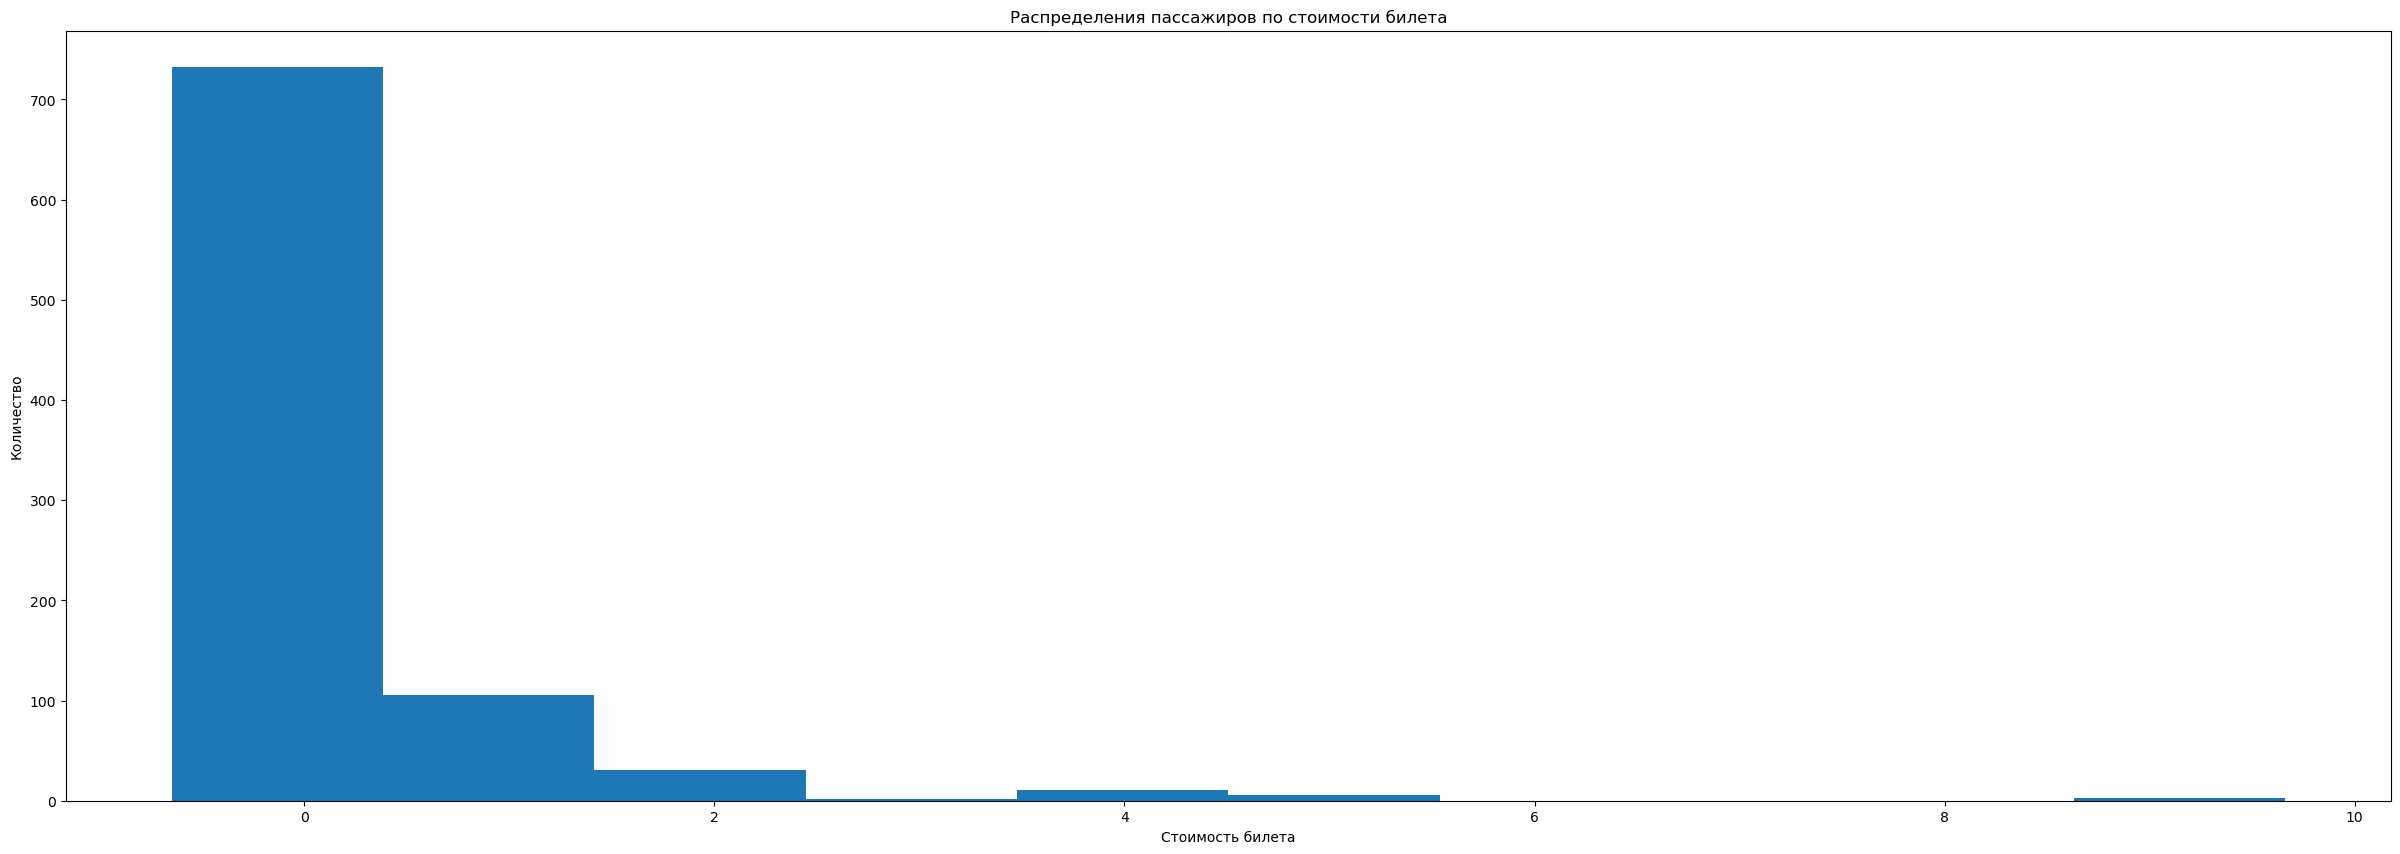

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Распределения пассажиров по стоимости билета')
plt.hist(titanic["Fare1"])
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')
plt.show()

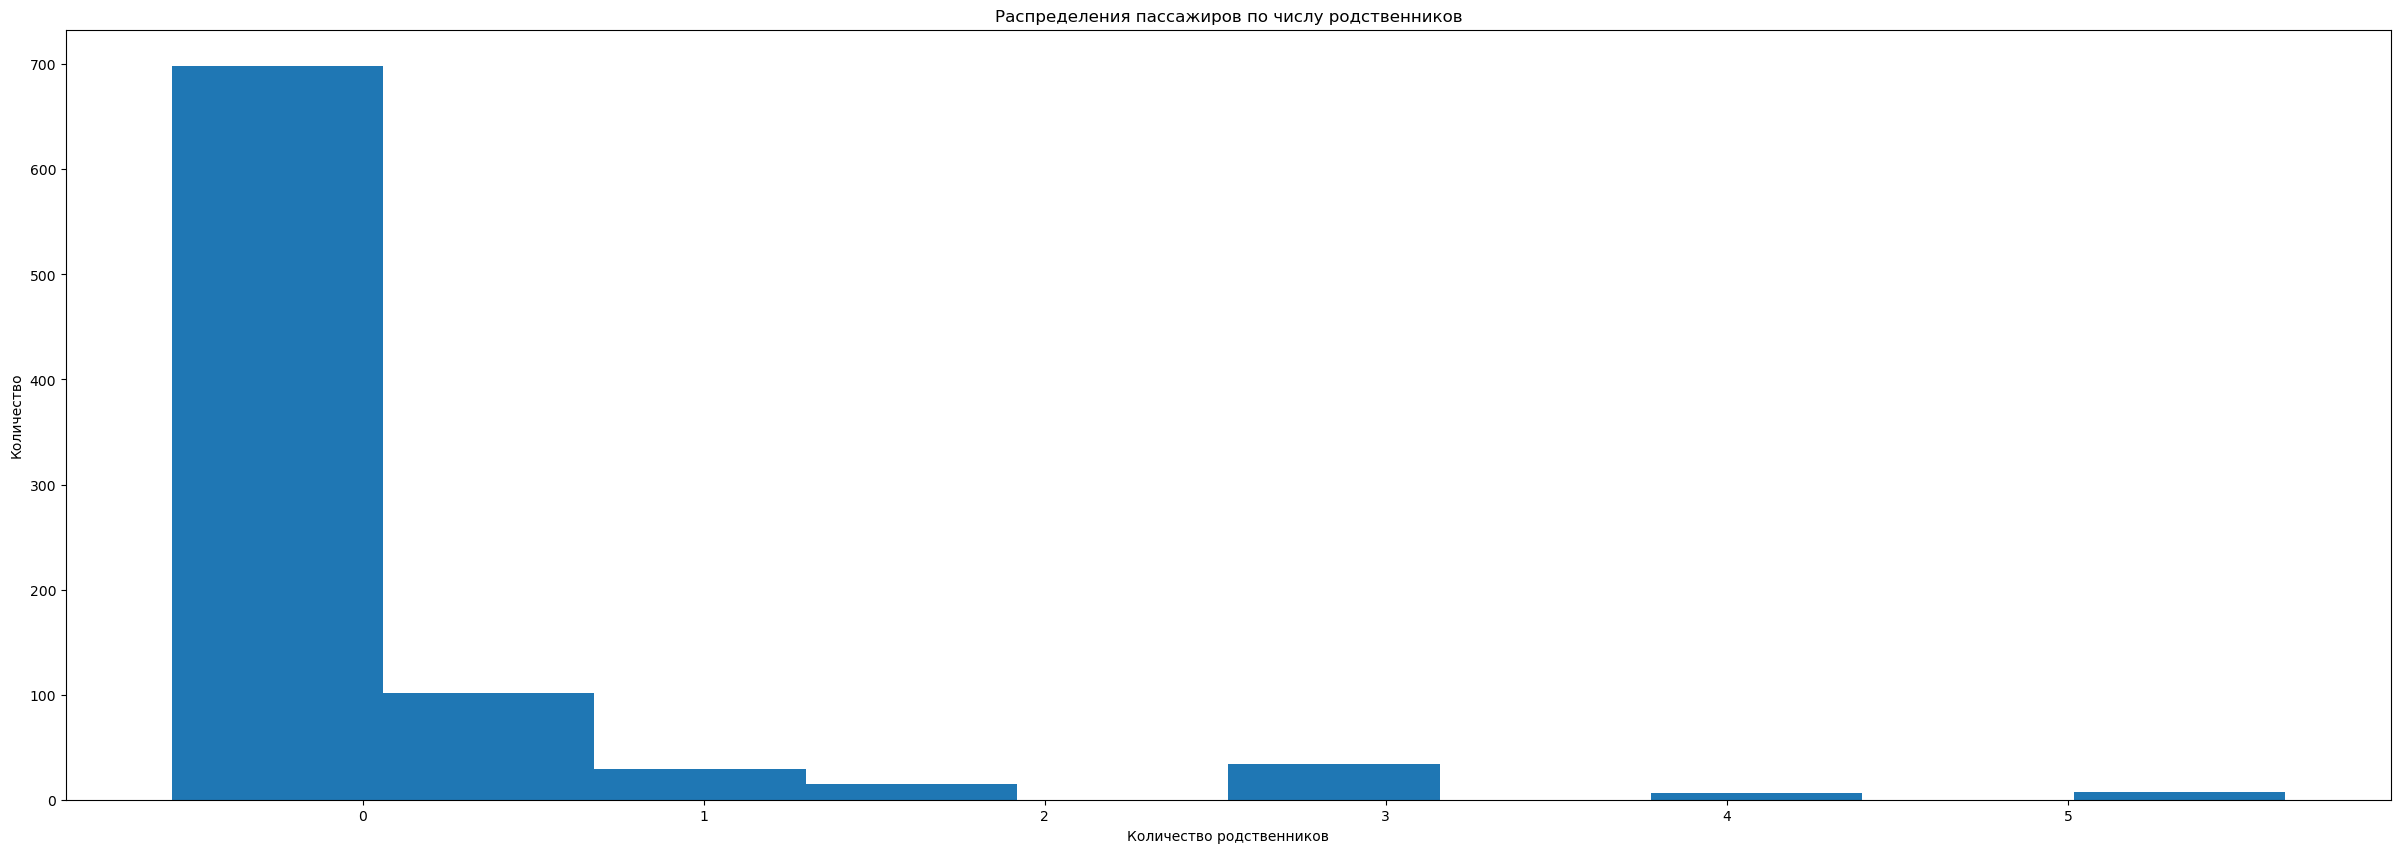

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Распределения пассажиров по числу родственников')
plt.hist(titanic["Relatives1"])
plt.xlabel('Количество родственников')
plt.ylabel('Количество')
plt.show()

Conclusion #2: By normalizing all the real-valued features, we have standardized the data. Now we can compare and group them.

### 16

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы.

In [ ]:
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 2

titanic.loc[titanic["Paluba"] == "T", "Paluba"] = 1
titanic.loc[titanic["Paluba"] == "A", "Paluba"] = 2
titanic.loc[titanic["Paluba"] == "B", "Paluba"] = 3
titanic.loc[titanic["Paluba"] == "C", "Paluba"] = 4
titanic.loc[titanic["Paluba"] == "D", "Paluba"] = 5
titanic.loc[titanic["Paluba"] == "E", "Paluba"] = 6
titanic.loc[titanic["Paluba"] == "F", "Paluba"] = 7
titanic.loc[titanic["Paluba"] == "G", "Paluba"] = 8
titanic.loc[titanic["Paluba"] == "N", "Paluba"] = 0

titanic.head()

,Survived,Pclass,Name,Sex,Cabin,Embarked,Paluba,Age1,SibSp1,Parch1,Fare1,Relatives1
0,0,3,"Braund, Mr. Owen Harris",0,N,2,0,-0.592148,0.432550,-0.473408,-0.502163,0.059127
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,C85,0,4,0.638430,0.432550,-0.473408,0.786404,0.059127
2,1,3,"Heikkinen, Miss. Laina",1,N,2,0,-0.284503,-0.474279,-0.473408,-0.488580,-0.560660
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,C123,2,4,0.407697,0.432550,-0.473408,0.420494,0.059127
4,0,3,"Allen, Mr. William Henry",0,N,2,0,0.407697,-0.474279,-0.473408,-0.486064,-0.560660


Conclusions: I replaced males with "0" and females with "1" in the gender column. Now, the port Cherbourg is represented as 0, Queenstown as 1, and Southampton as 2.

It's not practical to change ticket names since they have varying formats and wouldn't be usable. I also didn't modify cabin numbers as they are all unique. However, I introduced deck numbers, denoting them as 0 in case of missing information, and numbered the rest from 1 to 7 based on the deck level.

## Bonus Section on Machine Learning (up to 10 bonus point

### 17

Solve a binary classification problem to predict passenger survival (i.e., the target variable $y$ is the 'Survived' column). The goal is to predict whether each passenger will survive or not based on their feature space (i.e., the other columns) using the available data.

To achieve this, separate the target variable `'Survived'` from the training dataset and train a machine learning algorithm for classification using these labels (for beginners, you might consider learning about one of the simplest and most understandable algorithms like k-Nearest Neighbors - kNN). Utilizing the selected and trained algorithm, make predictions on the test dataset after preprocessing it similarly to the training data.

In [ ]:
titanic2=copy.deepcopy(titanic)
m1=[]

Since the data is already normalized, let's remove columns with string values as kNN cannot compute distances for them. I will also remove deck information since there are 687 missing values out of 891 rows. While one could consider removing all rows with missing deck information, it would result in a loss of 77% of the data, which is critical and unfortunate.

In [ ]:
titanic2=titanic2.drop(columns=['Name'])
titanic2=titanic2.drop(columns=['Cabin'])
titanic2=titanic2.drop(columns=['Paluba'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x=titanic2.drop('Survived',axis=1)
y=titanic2['Survived']

We will make a prediction about the passenger's survival and immediately determine the accuracy (I had difficulty with Kaggle, and the file is not being generated). We will choose a random state from 1 to 100 as the random seed. We will choose 1 as the value for the neighbor.

In [ ]:
for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = i)
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    #посчитаем точности по разным сидам, и занесем их всех в массив
    k="{:.2f}".format(knn.score(x_test, y_test))
    k=float(k)
    m1.append(k)

Узнаем максимальную точность, но мне кажется логичнее брать среднее арифметическое.

In [ ]:
from statistics import mean
print("Maximum accuracy: ", round(max(m1), 2), "  Mean accuracy: ", round(mean(m1), 2))

Maximum accuracy:  0.79   Mean accuracy:  0.75


Based on the data you worked with, a competition on Kaggle was created, aimed at beginner Data Scientists: https://www.kaggle.com/c/titanic. You're invited to participate – if you've reached this point, you're almost there. Register on Kaggle and accept the competition rules. If you already have predictions for the test dataset that you want to submit for evaluation and to appear on the leaderboard, you need to add them to a .csv file and format it correctly. In the data tab (https://www.kaggle.com/c/titanic/data), there's an example of how this file should look ("gender_submission.csv"). You can download and study it. For your convenience, below is the code that allows you to create the submission file.


* Conclusion: The maximum accuracy achieved was 0.79 with a random state of 57, and the average accuracy was 0.75.

I will attempt to improve accuracy by removing columns related to siblings, spouses, parents, and children from the data, since there's already a column with relatives that encompasses these elements. Furthermore, from previous tasks, it was calculated that higher ticket fares correlate with higher survival chances. I also presented a graph showing that the ticket fare depended on the chosen cabin class. Therefore, I filtered the data to retain only passengers from 1st and 2nd classes.

I'm doing the same thing as in the previous step, but additionally removing Parch and SibSp columns, and filtering the data.

In [ ]:
titanic2=copy.deepcopy(titanic)
m2=[]

In [ ]:
titanic2=titanic2.drop(columns=['Name'])
titanic2=titanic2.drop(columns=['Parch1'])
titanic2=titanic2.drop(columns=['SibSp1'])
titanic2=titanic2.drop(columns=['Cabin'])
titanic2=titanic2.drop(columns=['Paluba'])
titanic2=titanic2[(titanic2["Pclass"]==1) | (titanic2["Pclass"]==2)]

In [ ]:
x=titanic2.drop('Survived',axis=1)
y=titanic2['Survived']

In [ ]:
for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = i)
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    k="{:.2f}".format(knn.score(x_test, y_test))
    k=float(k)
    m2.append(k)

In [ ]:
print("Maximum accuracy: ", round(max(m2), 2), "  Mean accuracy: ", round(mean(m2), 2))

Maximum accuracy:  0.85   Mean accuracy:  0.77


Accuracy after additional transformations: Maximum accuracy is 0.85 with random state 57, and average accuracy is 0.77.